In [1]:
##Code written for Masters thesis to create various lightcurves of RW Aur as well as reference stars

import numpy as np                  # standard Python lib for math ops
#from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import glob, os                     # manage local files in your Compute containers

import astropy.io                     #import various functions from astropy
from astropy.io import fits
from astropy.io.fits import getdata
from astropy.io.fits import getval
from astropy.io.fits import getheader
from astropy.table import QTable
import astropy.units as u
from astropy.coordinates import SkyCoord 
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.stats import sigma_clipped_stats
from astropy import wcs
from astropy.wcs import WCS

import photutils                          #import function from photutils to measure stars
from photutils import SkyCircularAperture
from photutils import CircularAperture
from photutils import SkyCircularAnnulus
from photutils import CircularAnnulus
from photutils import aperture_photometry

from scipy import optimize

In [2]:
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")
list = glob.glob("*.fits") #open all .fits files in directory

file = [None] * (len(list)-1)   #initialise list for file names
filts = [None] * (len(list)-1)  #initialise list for filter
expo = [None] * (len(list)-1)   #initialise list for exposure time
jul = [None] * (len(list)-1)    #initialise list for julian date
time = [None] * (len(list)-1)   #initialise list for time image taken

dim=(len(list)-1,1)  #initialising lists to create a continous timescale from the julian date
ahours=np.empty(dim)
bhours=np.empty(dim)
day=np.empty(dim)
amins=np.empty(dim)
bmins=np.empty(dim)

for i in range(0,len(list)-1):        #For loop that stores iterative value of each category in a corresponding list
    data = fits.open(list[i])
    name = data[0].header['FILENAME']
    file[i] = name
    filt = data[0].header['INSFILTE']
    filts[i] = filt
    exp = data[0].header['EXPTIME']
    expo[i] = exp
    jd = data[0].header['JD']
    jul[i] = jd
    day[i]=jd-jul[0]                   #creates scale for date starting at 0 instead of the first julian date
    t = data[0].header['UT']
    time[i] = t                        #only certain characters of the universal time are taken due to the nature of its format
    ahours[i] = t[0]
    bhours[i] = t[1]
    amins[i] = t[3]
    bmins[i] = t[4]
    
    data.close
    
hours = (ahours*10)+bhours             #convert hours and mins of universal time into full timescale
mins = (amins*10)+bmins
tscale = ((hours + (mins/60)) / 24) + day


In [3]:
#table to help identify different values in certain categories
table = QTable([file, filts, expo, jul, time],
           names=('File name','Filter', 'Exposure Time', 'Julian Date', 'Universal Time'),            
           meta={'name': 'first table'})

table.show_in_notebook()

idx,File name,Filter,Exposure Time,Julian Date,Universal Time
0,O170114_0097.fits,Halpha40,10.000,2457767.5,21:16:43.879
1,O170114_0098.fits,Halpha40,10.000,2457767.5,21:17:20.521
2,O170114_0099.fits,Halpha40,10.000,2457767.5,21:17:56.193
3,O170114_0100.fits,Halpha40,100.000,2457767.5,21:18:32.491
4,O170114_0101.fits,Halpha40,100.000,2457767.5,21:20:39.555
5,O170114_0102.fits,Halpha40,100.000,2457767.5,21:22:46.759
6,O170114_0103.fits,SDSSu,10.000,2457767.5,21:24:57.462
7,O170114_0104.fits,SDSSu,10.000,2457767.5,21:25:33.603
8,O170114_0105.fits,SDSSu,10.000,2457767.5,21:26:11.307
9,O170114_0106.fits,SDSSu,100.000,2457767.5,21:26:49.291


In [4]:
##Define function for aperture photometry
#5 images of chosen star on different nights


def ap_phot(coord1,coord2,coord3,coord4,coord5,idx1,idx2,idx3,idx4,idx5):
    
    data1 = getdata(list[idx1])                          #retrieves information on required image
    ap1 = CircularAperture(coord1, r = 7. )              #takes chosen coordinate and creates circular aperture around it
    ann1 = CircularAnnulus(coord1, r_in=8. , r_out=12. ) #creates annulus around aperture with purpose of removing background
    aps1 = [ap1, ann1]
    phot1 = aperture_photometry(data1, aps1)             #performs aperture photometry on aperture and annulus
    plt.figure(figsize=(70,10))                          #plots chosen star with aperture and annulus so that user can check photometry has been performed correctly
    plt.subplot(1,6,1)
    plt.imshow(data1, cmap='Greys_r', origin='lower')
    ap1.plot(color='red', lw=1.5, alpha=0.5)
    ann1.plot(color='green', lw=1.5, alpha=0.5)
    plt.xlim([coord1[0]-30,coord1[0]+30])
    plt.ylim([coord1[1]-30,coord1[1]+30])
    plt.axis('off')

    data2 = getdata(list[idx2])                         #same process for 1st reference star
    ap2 = CircularAperture(coord2, r = 7. )
    ann2 = CircularAnnulus(coord2, r_in=8. , r_out=12. )
    aps2 = [ap2, ann2]
    phot2 = aperture_photometry(data2, aps2)
    plt.subplot(1,6,2)
    plt.imshow(data2, cmap='Greys_r', origin='lower')
    ap2.plot(color='red', lw=1.5, alpha=0.5)
    ann2.plot(color='green', lw=1.5, alpha=0.5)
    plt.xlim([coord2[0]-30,coord2[0]+30])
    plt.ylim([coord2[1]-30,coord2[1]+30])
    plt.axis('off')

    data3 = getdata(list[idx3])                        #same process for 2nd reference star
    ap3 = CircularAperture(coord3, r = 7. )
    ann3 = CircularAnnulus(coord3, r_in=8. , r_out=12. )
    aps3 = [ap3, ann3]
    phot3 = aperture_photometry(data3, aps3)
    plt.subplot(1,6,3)
    plt.imshow(data3, cmap='Greys_r', origin='lower')
    ap3.plot(color='red', lw=1.5, alpha=0.5)
    ann3.plot(color='green', lw=1.5, alpha=0.5)
    plt.xlim([coord3[0]-30,coord3[0]+30])
    plt.ylim([coord3[1]-30,coord3[1]+30])
    plt.axis('off')

    data4 = getdata(list[idx4])                      #same process for 3rd reference star
    ap4 = CircularAperture(coord4, r = 7. )
    ann4 = CircularAnnulus(coord4, r_in=8. , r_out=12. )
    aps4 = [ap4, ann4]
    phot4 = aperture_photometry(data4, aps4)
    plt.subplot(1,6,4)
    plt.imshow(data4, cmap='Greys_r', origin='lower')
    ap4.plot(color='red', lw=1.5, alpha=0.5)
    ann4.plot(color='green', lw=1.5, alpha=0.5)
    plt.xlim([coord4[0]-30,coord4[0]+30])
    plt.ylim([coord4[1]-30,coord4[1]+30])
    plt.axis('off')

    data5 = getdata(list[idx5])                    #same process for 4th reference star
    ap5 = CircularAperture(coord5, r = 7. )
    ann5 = CircularAnnulus(coord5, r_in=8. , r_out=12. )
    aps5 = [ap5, ann5]
    phot5 = aperture_photometry(data5, aps5)
    plt.subplot(1,6,5)
    plt.imshow(data5, cmap='Greys_r', origin='lower')
    ap5.plot(color='red', lw=1.5, alpha=0.5)
    ann5.plot(color='green', lw=1.5, alpha=0.5)
    plt.xlim([coord5[0]-30,coord5[0]+30])
    plt.ylim([coord5[1]-30,coord5[1]+30])
    plt.axis('off')
    
    
    ##Removing background flux using the photometry in the annulus once for each image
    ann_area = (np.pi*(12)**2)-(np.pi*(8)**2)
    ann_flux1 = (phot1['aperture_sum_1'])/ann_area
    aper_bkg1 = ann_flux1*(np.pi*(7)**2)

    ann_flux2 = (phot2['aperture_sum_1'])/ann_area
    aper_bkg2 = ann_flux2*(np.pi*(7)**2)

    ann_flux3 = (phot3['aperture_sum_1'])/ann_area
    aper_bkg3 = ann_flux3*(np.pi*(7)**2)

    ann_flux4 = (phot4['aperture_sum_1'])/ann_area
    aper_bkg4 = ann_flux4*(np.pi*(7)**2)

    ann_flux5 = (phot5['aperture_sum_1'])/ann_area
    aper_bkg5 = ann_flux5*(np.pi*(7)**2)

    shape = (5,1)                               #subtracts background flux from measured flux to get true flux
    flux = np.empty(shape)
    flux[0] = phot1['aperture_sum_0']-aper_bkg1
    flux[1] = phot2['aperture_sum_0']-aper_bkg2
    flux[2] = phot3['aperture_sum_0']-aper_bkg3
    flux[3] = phot4['aperture_sum_0']-aper_bkg4
    flux[4] = phot5['aperture_sum_0']-aper_bkg5
    
    #calculates magnitude from flux
    mag=(np.log10(flux)*(-2.5))
    return mag

#define function for constructing lightcurves from measured magnitudes

def lightcurve(mag,mag_a,mag_b,mag_c,mag_d,idx1,idx2,idx3,idx4,idx5,filt):
    shape=(5,1)
    mean = np.empty(shape)
    for i in range (0,5):
        mean[i] = (mag_a[i]+mag_b[i]+mag_c[i]+mag_d[i])/4 #calculates average magnitude of background stars

    newmag = mag-mean       #calculates adjusted magnitude to center reference stars around zero.
    newmag_a = mag_a-mean
    newmag_b = mag_b-mean
    newmag_c = mag_c-mean
    newmag_d = mag_d-mean
    
    mean2 = np.empty(shape)
    for i in range (0,5):
        mean2[i] = (newmag_a[i]+newmag_b[i]+newmag_c[i]+newmag_d[i])/4 #creates array of background star average magnitude after adjustment
        
    diff = np.mean(newmag) - np.mean(mean2)
    mean2 = mean2 + diff

    rms = np.std(newmag)             #calculate standard deviation of each magnitude
    rms_a = np.std(newmag_a)
    rms_b = np.std(newmag_b)
    rms_c = np.std(newmag_c)
    rms_d = np.std(newmag_d)
    err = max(rms_a,rms_b,rms_c,rms_d) #error bars are taken from max standard deviation

    print('RW Aur RMS =', rms)
    print('Star A RMS =', rms_a)
    print('Star B RMS =', rms_b)
    print('Star C RMS =', rms_c)
    print('Star D RMS =', rms_d)
    
    shape=(5,1)                     #creates array of date values for date
    date = np.empty(shape)
    date[0] = tscale[idx1]
    date[1] = tscale[idx2]
    date[2] = tscale[idx3]
    date[3] = tscale[idx4]
    date[4] = tscale[idx5]
    
    #plotting RW Aur and magnitudes of background stars against time with error bars and legend
    
    plt.figure()#figsize=(15,10))
    plt.errorbar(date,newmag,yerr=err,fmt='.',capsize=3)
    plt.errorbar(date,newmag_a,yerr=err,fmt='.',capsize=3)
    plt.errorbar(date,newmag_b,yerr=err,fmt='.',capsize=3)
    plt.errorbar(date,newmag_c,yerr=err,fmt='.',capsize=3)
    plt.errorbar(date,newmag_d,yerr=err,fmt='.',capsize=3)
    plt.xlabel('Days from first observation')#,fontsize=36)
    plt.ylabel('Relative Magnitude')#,fontsize=36)
    plt.gca().invert_yaxis()
    plt.legend(('RW Auriga','Star A','Star B','Star C','Star D'),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)#,fontsize=36)
    plt.title('Lightcurve in '+filt+' band')#,fontsize=42)
    os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
    plt.savefig(filt+'lightcurve.jpg', bbox_inches='tight')
    
    
    #plotting RW Aur magnitude and average of background star magnitude to illustrate how much brighter RW Aur is than reference stars.
    
    plt.figure()#figsize=(15,10))
    plt.errorbar(date,newmag,yerr=err,fmt='.',capsize=3)
    plt.errorbar(date,mean2,yerr=err,fmt='.',capsize=3)
    plt.xlabel('Days from first observation')#,fontsize=36)
    plt.ylabel('Relative Magnitude')#,fontsize=36)
    plt.gca().invert_yaxis()
    plt.legend(('RW Auriga','Comparison Star Mean'),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)#,fontsize=36)
    plt.title('Adjusted Lightcurve in '+filt+' band')#,fontsize=42)
    os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
    plt.savefig(filt+'lightcurvemean.jpg', bbox_inches='tight')
    
    RMS = rms, rms_a, rms_b, rms_c, rms_d
    return RMS, newmag, mean2



R Band Analysis - creating lightcurves from images observed in the R band


RW Aur RMS = 0.07506383175289875
Star A RMS = 0.0038844927805314574
Star B RMS = 0.003441266915845177
Star C RMS = 0.002780944596896677
Star D RMS = 0.0023031978087383557


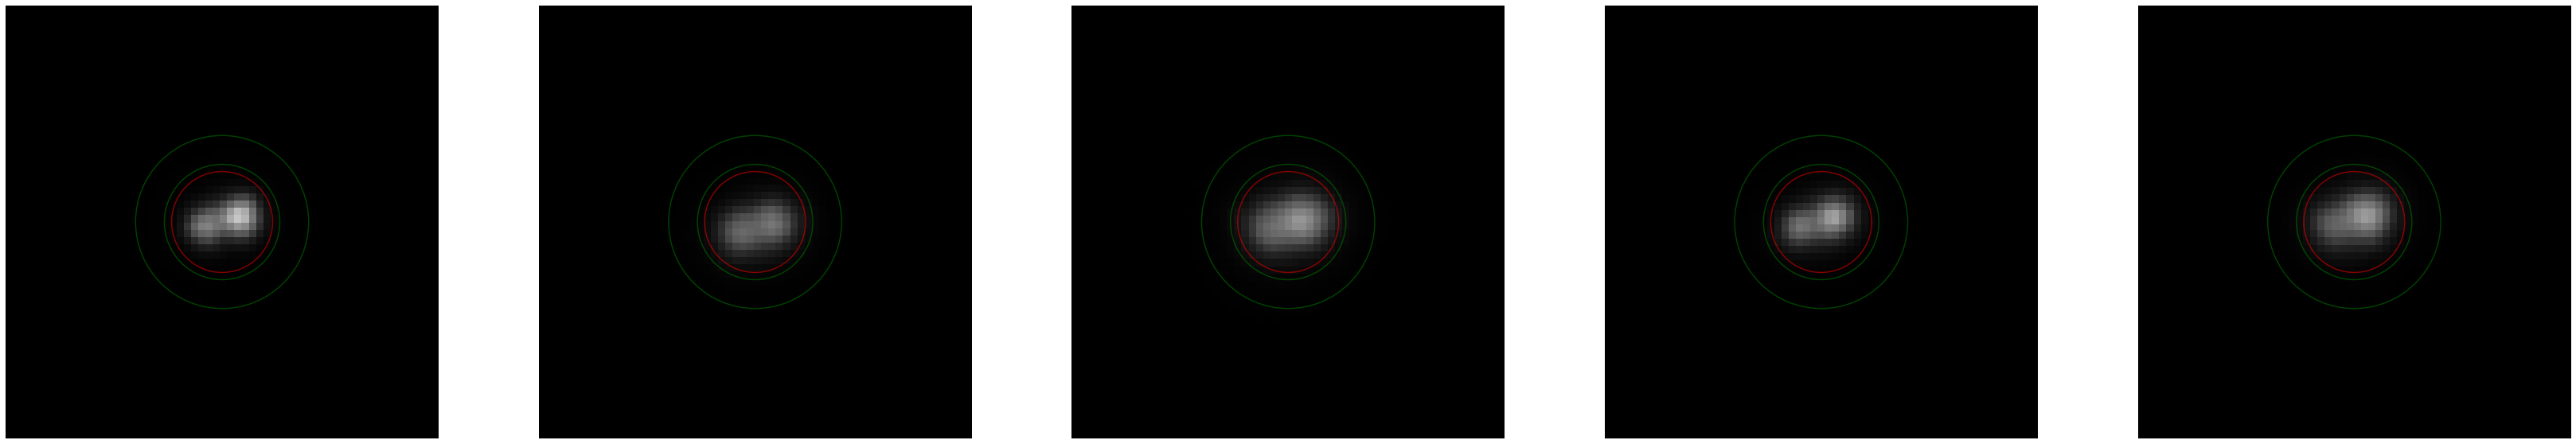

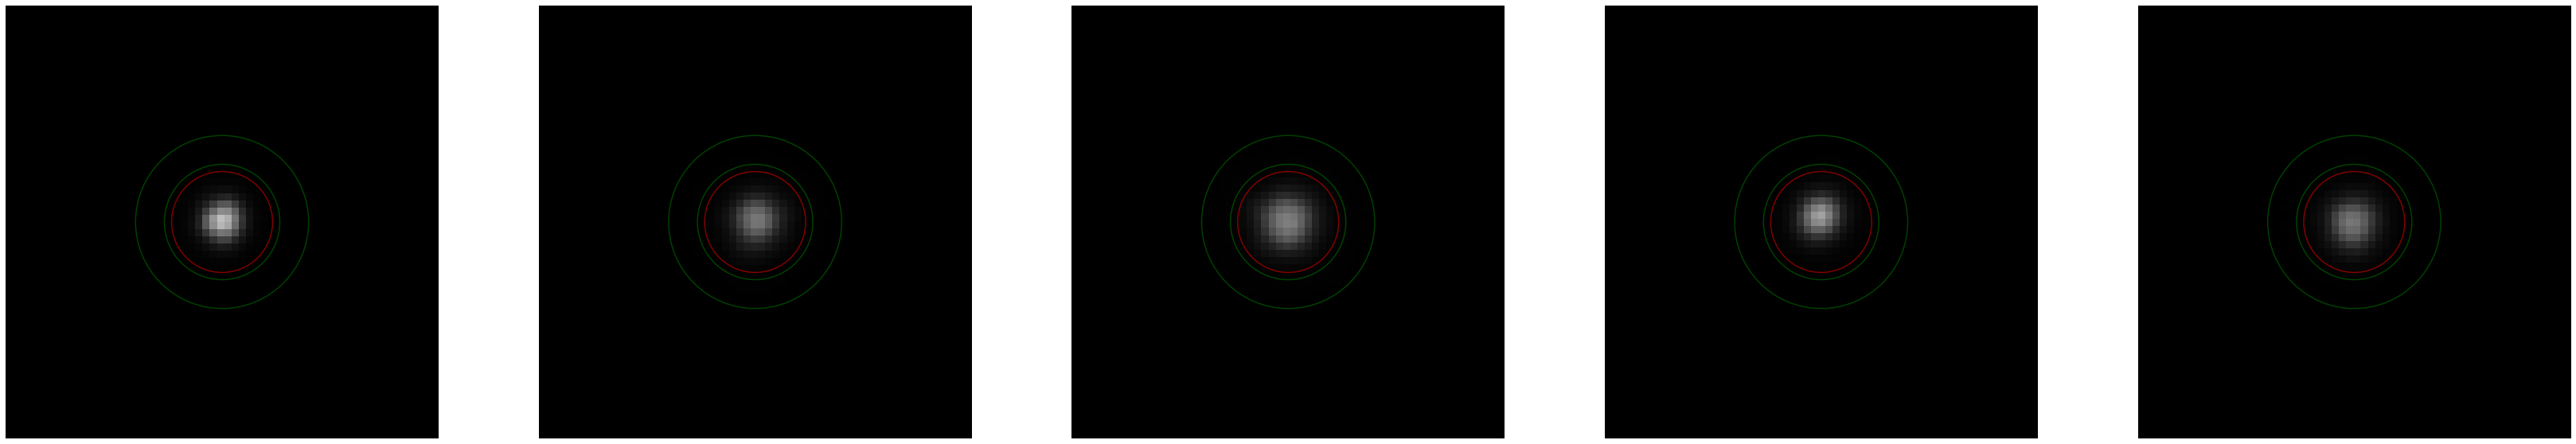

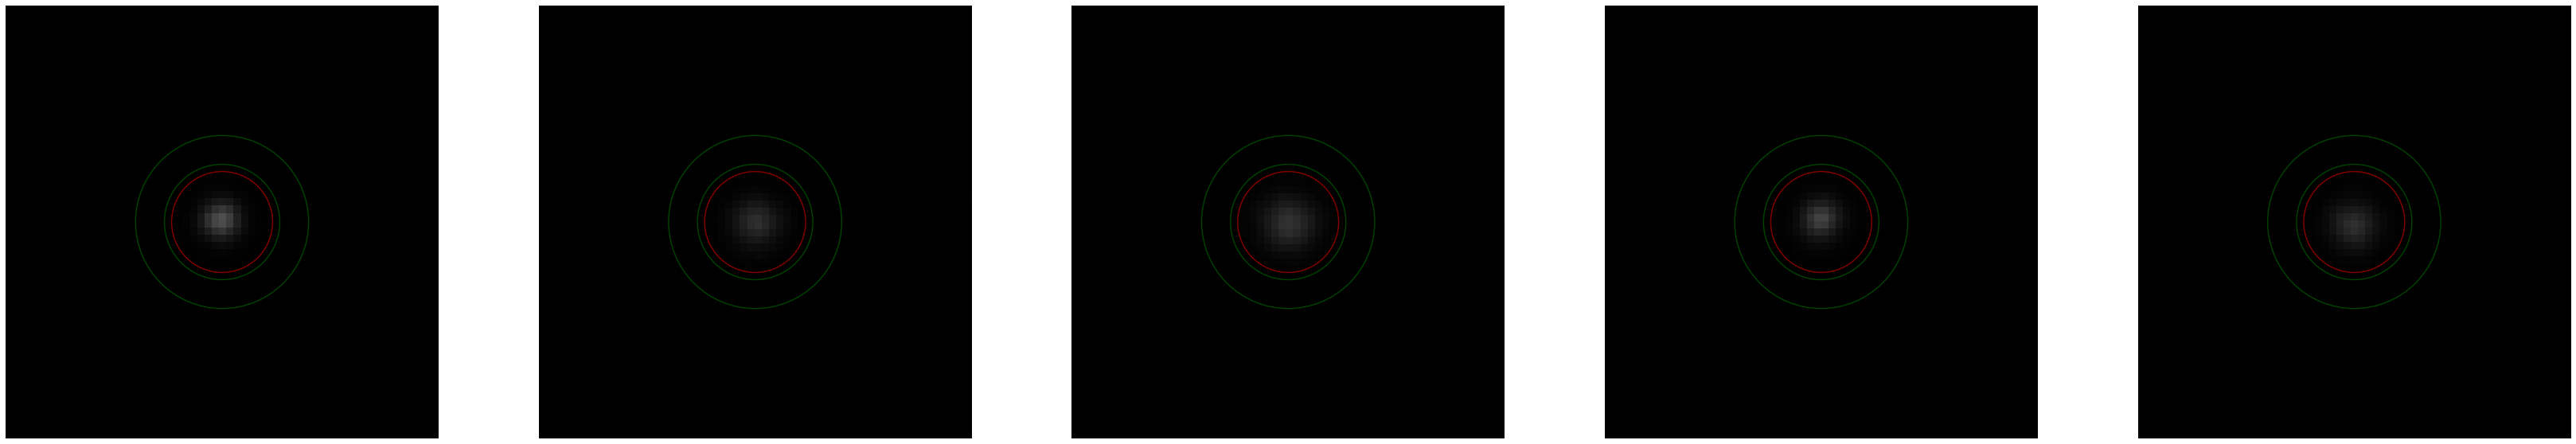

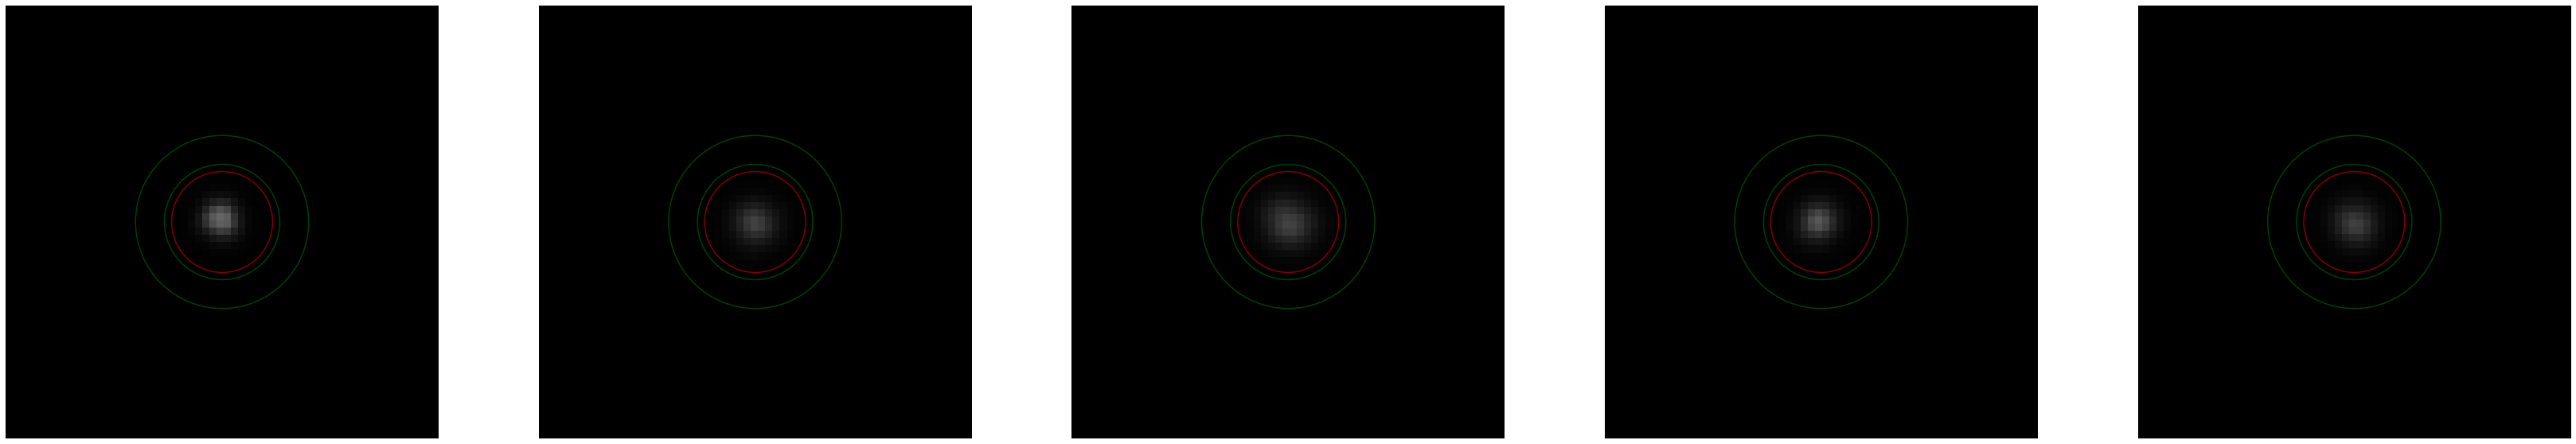

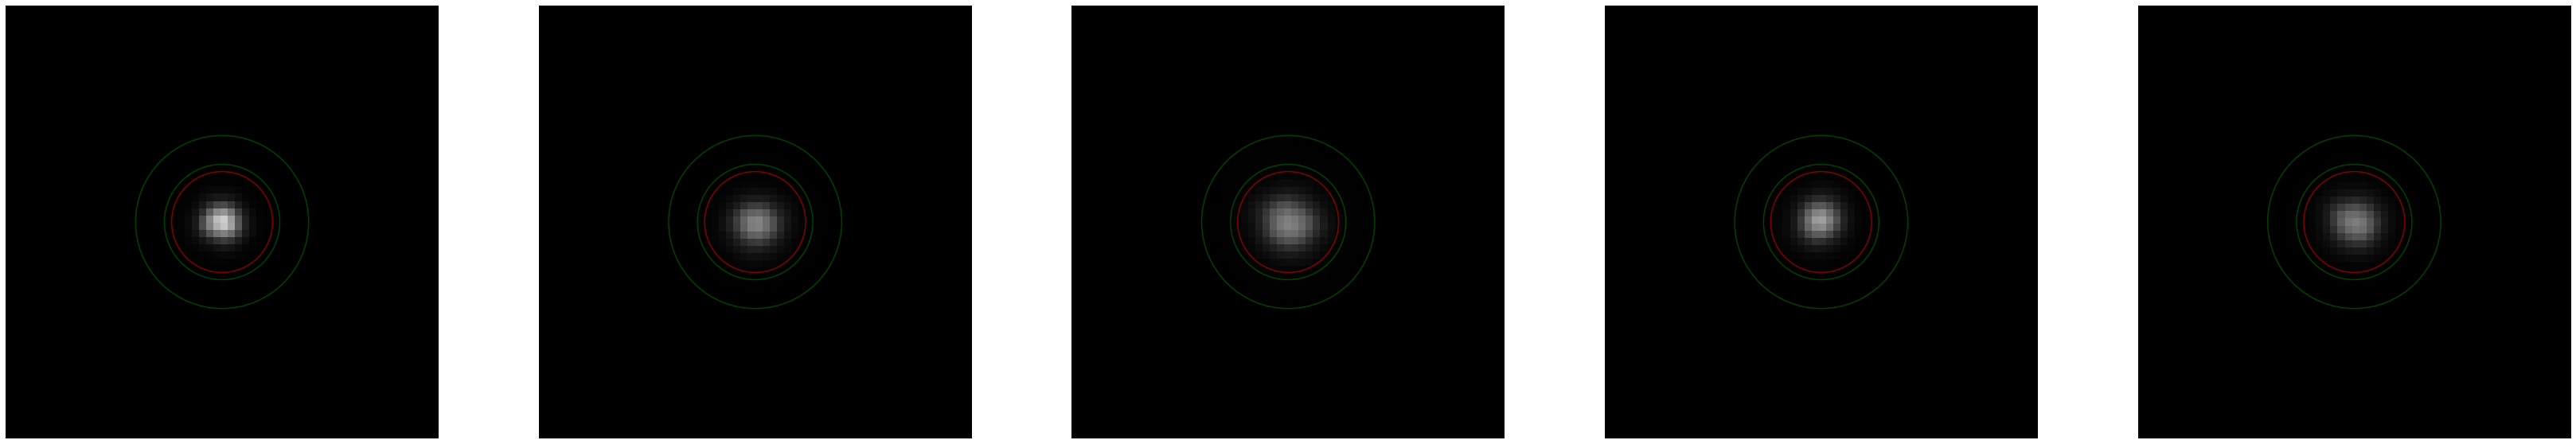

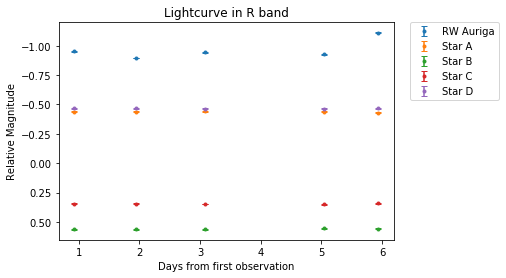

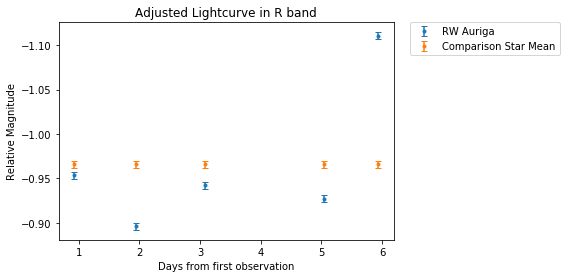

In [5]:
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")   

#One r band image from each observation day
Rdata1 = getdata('redO170114_0133.new.fits')
Rdata2 = getdata('redO170115_0099.new.fits')
Rdata4 = getdata('redO170116_0449.new.fits')
Rdata5 = getdata('redO170118_0109.new.fits')
Rdata6 = getdata('redO170119_0111.new.fits')


#index of each image in list
r_idx1 = 36
r_idx2 = 56
r_idx3 = 110
r_idx4 = 128
r_idx5 = 169

shape=(5,1)
r_date = np.empty(shape)
r_date[0] = tscale[r_idx1]
r_date[1] = tscale[r_idx2]
r_date[2] = tscale[r_idx3]
r_date[3] = tscale[r_idx4]
r_date[4] = tscale[r_idx5]

#co-ordinate of RW Aur each day
r_c1 = [1024.8,968.554]
r_c2 = [1008.7,965.336]
r_c3 = [932.958,976.622]
r_c4 = [900.025,944.796]
r_c5 = [964.647,898.644]

#get magnitude of RW Aur via aperture photometry
r_RWmag = ap_phot(r_c1,r_c2,r_c3,r_c4,r_c5,r_idx1,r_idx2,r_idx3,r_idx4,r_idx5)

##Do the same routine for background stars
#Star A
r_c_a1 = [1240.21,664.476]
r_c_a2 = [1224.14,660.420]
r_c_a3 = [1148.20,672.325]
r_c_a4 = [1114.93,640.037]
r_c_a5 = [1179.68,595.098]

r_mag_a = ap_phot(r_c_a1,r_c_a2,r_c_a3,r_c_a4,r_c_a5,r_idx1,r_idx2,r_idx3,r_idx4,r_idx5)

#Star B

r_c_b1 = [744.901,1066.23]
r_c_b2 = [728.654,1062.53]
r_c_b3 = [652.784,1074.54]
r_c_b4 = [619.490,1042.39]
r_c_b5 = [684.029,997.249]

r_mag_b = ap_phot(r_c_b1,r_c_b2,r_c_b3,r_c_b4,r_c_b5,r_idx1,r_idx2,r_idx3,r_idx4,r_idx5)

#Star C

r_c_c1 = [948.255,1539.24]
r_c_c2 = [932.142,1535.74]
r_c_c3 = [856.260,1547.36]
r_c_c4 = [823.367,1515.75]
r_c_c5 = [887.293,1470.13]

r_mag_c = ap_phot(r_c_c1,r_c_c2,r_c_c3,r_c_c4,r_c_c5,r_idx1,r_idx2,r_idx3,r_idx4,r_idx5)

#Star D 

r_c_d1 = [388.713,1703.58]
r_c_d2 = [372.555,1699.77]
r_c_d3 = [297.034,1711.61]
r_c_d4 = [263.852,1679.72]
r_c_d5 = [327.873,1634.00]

r_mag_d = ap_phot(r_c_d1,r_c_d2,r_c_d3,r_c_d4,r_c_d5,r_idx1,r_idx2,r_idx3,r_idx4,r_idx5)

#construct lightcurve
r_filt= 'R'
r_out = lightcurve(r_RWmag,r_mag_a,r_mag_b,r_mag_c,r_mag_d,r_idx1,r_idx2,r_idx3,r_idx4,r_idx5,r_filt)


H Alpha Analysis

RW Aur RMS = 0.053762497114737205
Star A RMS = 0.00721627627590133
Star B RMS = 0.0037078256733469677
Star C RMS = 0.0059939658184774295
Star D RMS = 0.007169444098361327


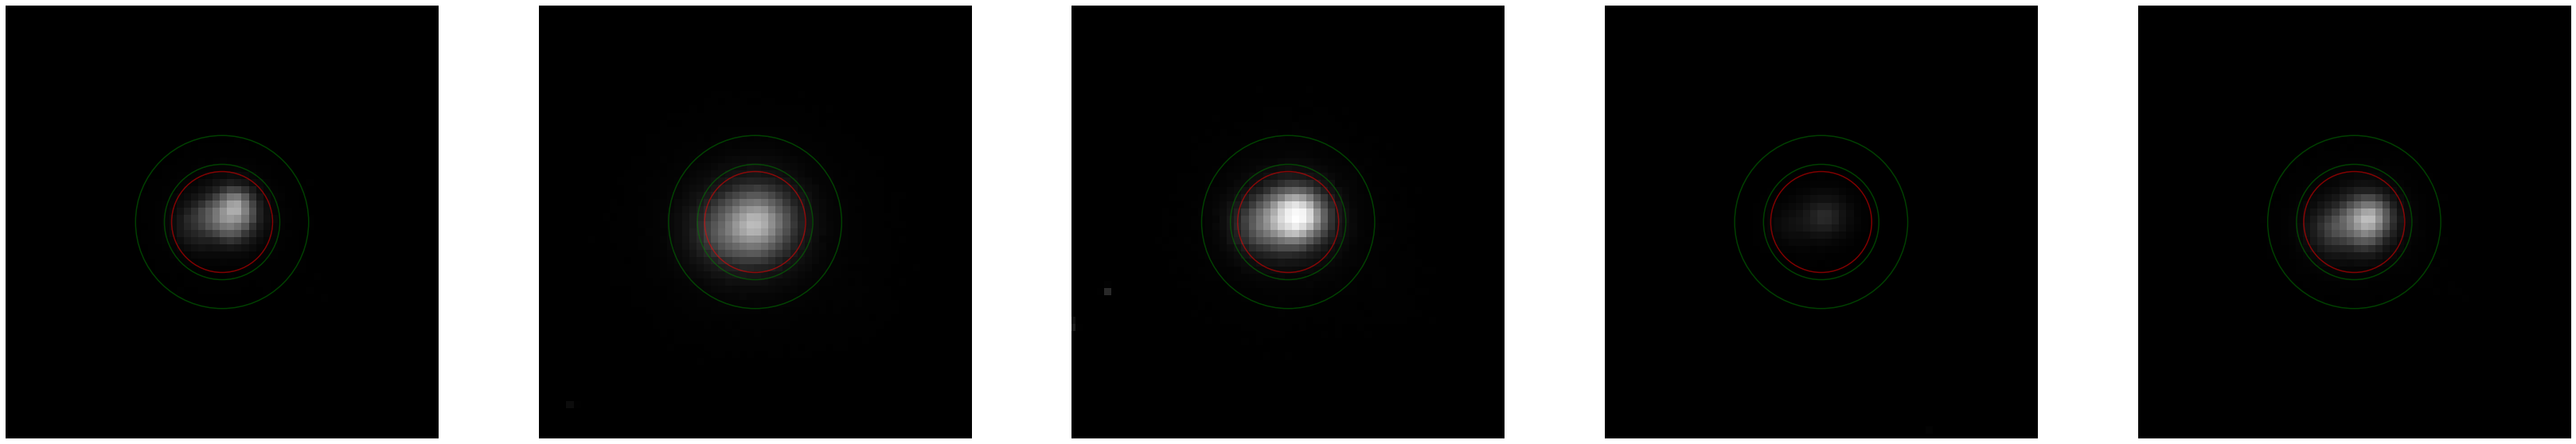

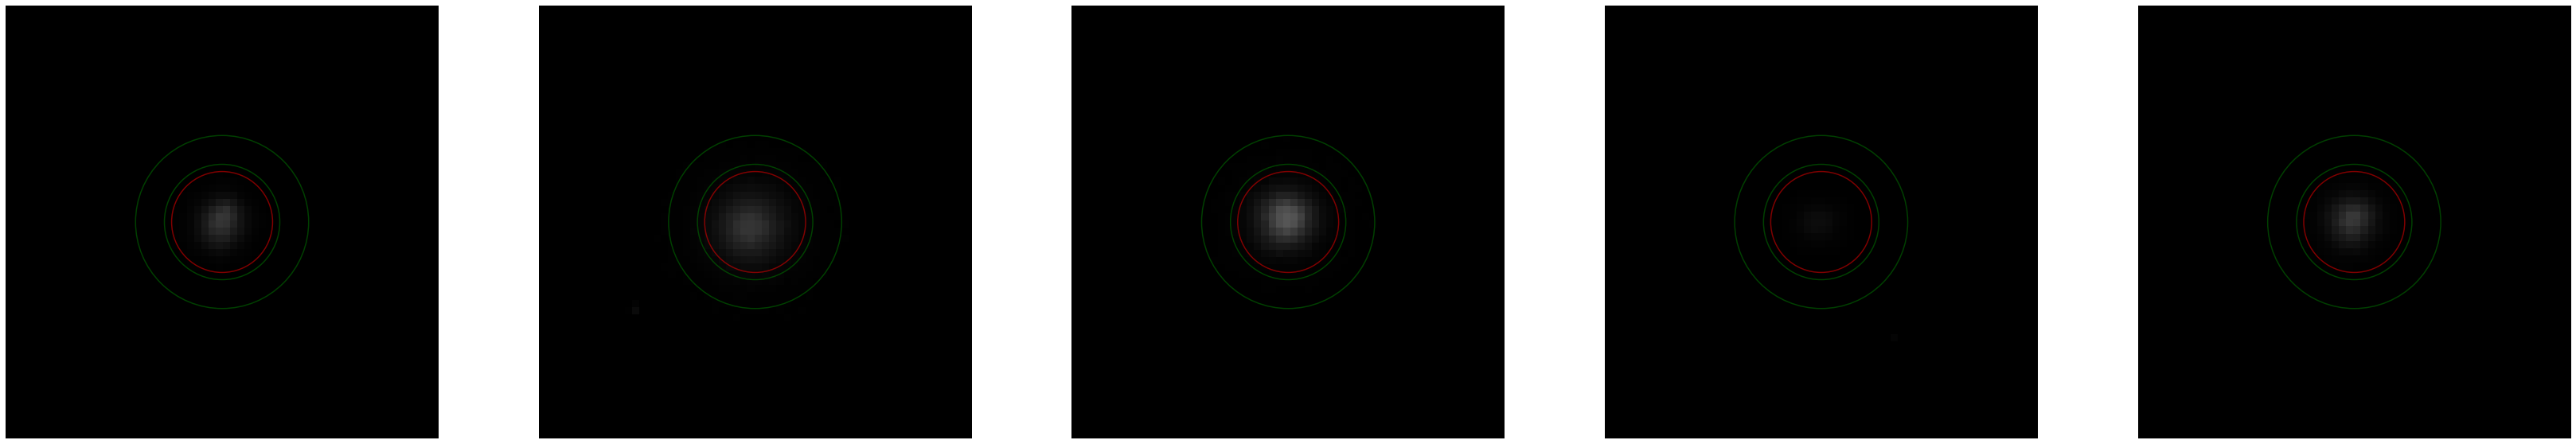

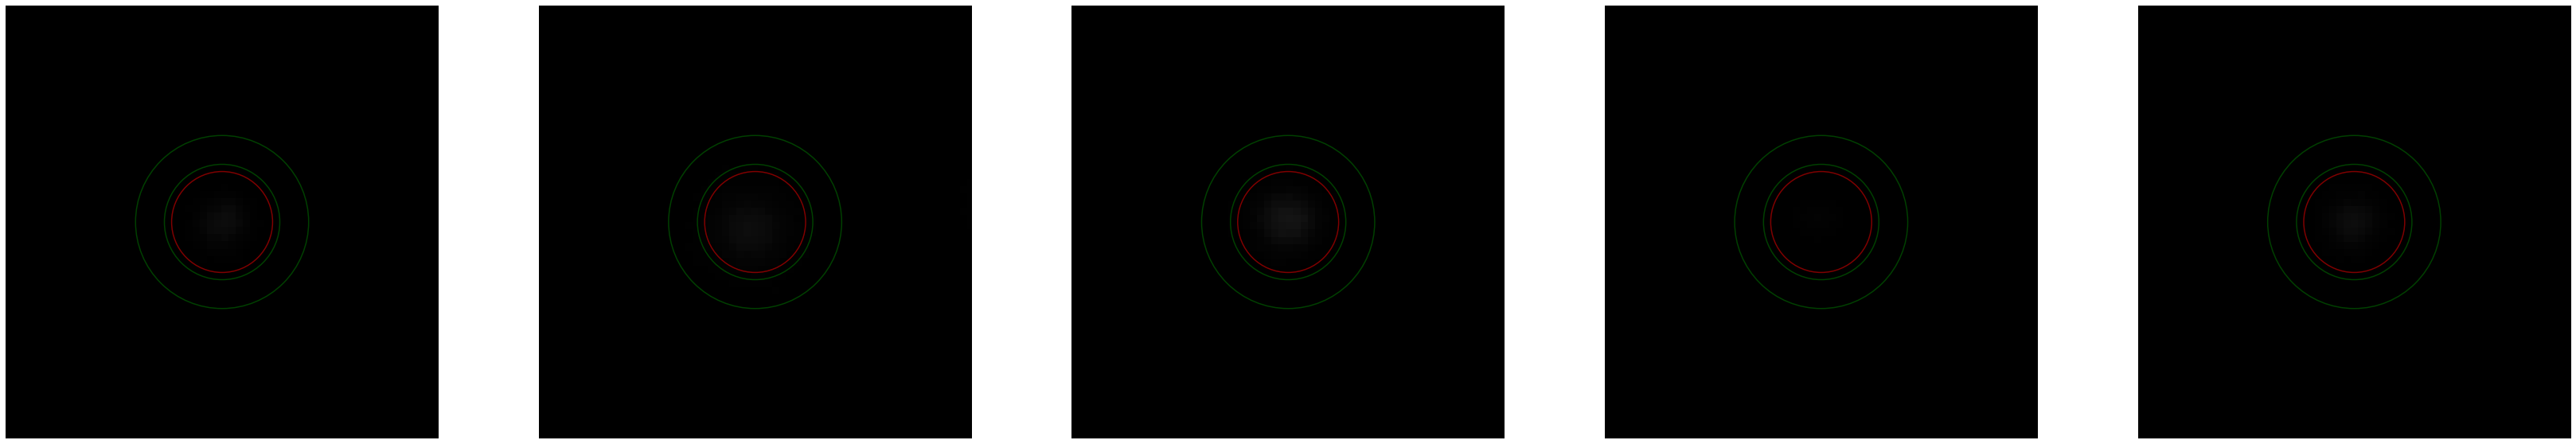

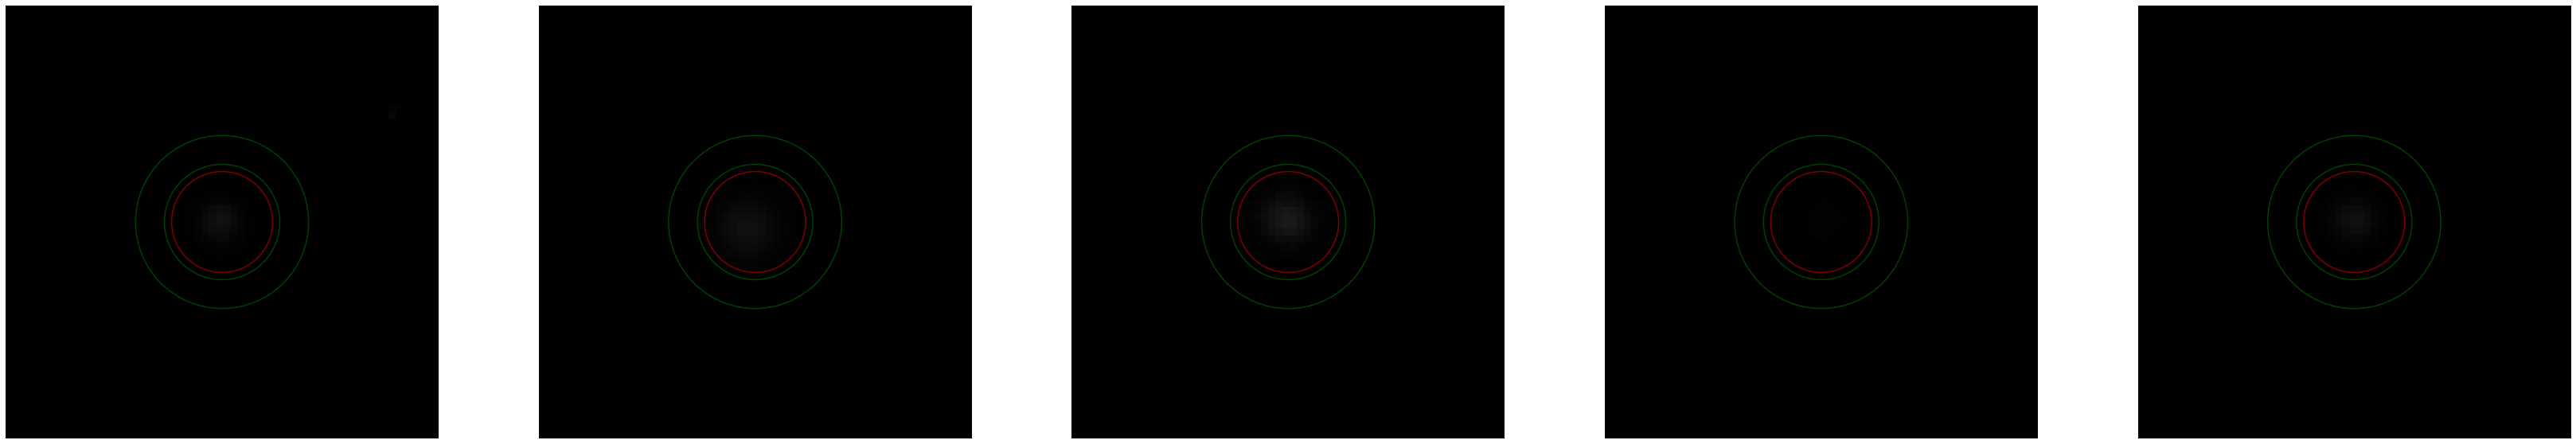

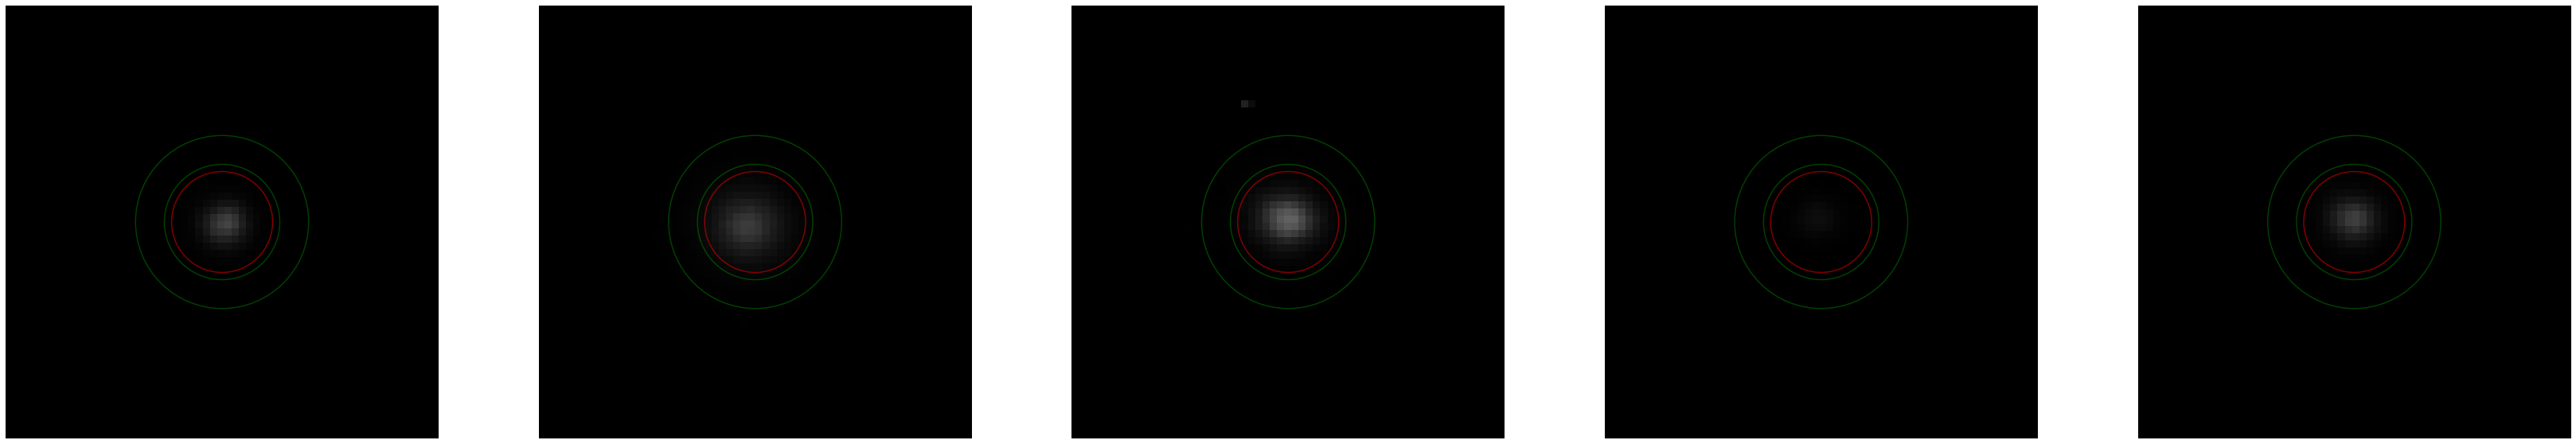

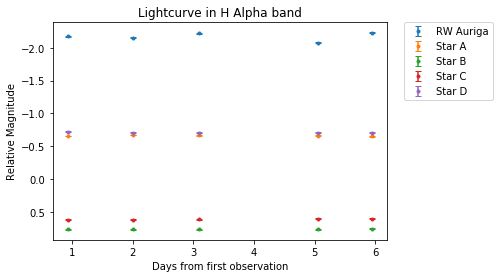

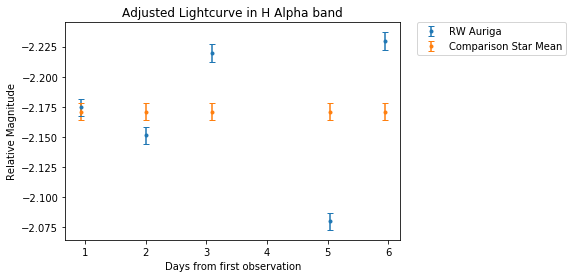

In [6]:
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")   

#One r band image from each observation day
Hdata1 = getdata('redO170114_0145.new.fits')
Hdata2 = getdata('redO170115_0113.new.fits')
Hdata3 = getdata('redO170116_0457.new.fits')
Hdata4 = getdata('redO170118_0114.new.fits')
Hdata5 = getdata('redO170119_0117.new.fits')

#index of each image in list
h_idx1 = 48
h_idx2 = 70
h_idx3 = 118
h_idx4 = 133
h_idx5 = 175


shape=(5,1)
h_date = np.empty(shape)
h_date[0] = tscale[h_idx1]
h_date[1] = tscale[h_idx2]
h_date[2] = tscale[h_idx3]
h_date[3] = tscale[h_idx4]
h_date[4] = tscale[h_idx5]


#co-ordinates of RW Aur on each night
h_c1 = [1025.8,968.554]
h_c2 = [1010.7,966.336]
h_c3 = [933.958,976.622]
h_c4 = [901.025,944.796]
h_c5 = [964.647,899.644]


h_RWmag = ap_phot(h_c1,h_c2,h_c3,h_c4,h_c5,h_idx1,h_idx2,h_idx3,h_idx4,h_idx5)

##Do the same routine for background stars
#Star A
h_c_a1 = [1240.40,665.280]
h_c_a2 = [1224.58,662.256]
h_c_a3 = [1148.20,672.325]
h_c_a4 = [1114.93,641.037]
h_c_a5 = [1179.68,595.098]


h_mag_a = ap_phot(h_c_a1,h_c_a2,h_c_a3,h_c_a4,h_c_a5,h_idx1,h_idx2,h_idx3,h_idx4,h_idx5)

#Star B
h_c_b1 = [744.600,1067.20]
h_c_b2 = [729.153,1064.51]
h_c_b3 = [652.784,1074.54]
h_c_b4 = [619.490,1042.39]
h_c_b5 = [684.029,997.249]


h_mag_b = ap_phot(h_c_b1,h_c_b2,h_c_b3,h_c_b4,h_c_b5,h_idx1,h_idx2,h_idx3,h_idx4,h_idx5)

#Star C
h_c_c1 = [948.400,1540.20]
h_c_c2 = [933.024,1537.44]
h_c_c3 = [856.260,1547.36]
h_c_c4 = [822.367,1515.75]
h_c_c5 = [887.293,1470.13]


h_mag_c = ap_phot(h_c_c1,h_c_c2,h_c_c3,h_c_c4,h_c_c5,h_idx1,h_idx2,h_idx3,h_idx4,h_idx5)

#Star D
h_c_d1 = [388.200,1704.40]
h_c_d2 = [373.564,1701.26]
h_c_d3 = [297.034,1711.61]
h_c_d4 = [263.852,1679.72]
h_c_d5 = [327.873,1634.00]


h_mag_d = ap_phot(h_c_d1,h_c_d2,h_c_d3,h_c_d4,h_c_d5,h_idx1,h_idx2,h_idx3,h_idx4,h_idx5,)

#construct lightcurve
h_filt='H Alpha'
h_out = lightcurve(h_RWmag,h_mag_a,h_mag_b,h_mag_c,h_mag_d,h_idx1,h_idx2,h_idx3,h_idx4,h_idx5,h_filt)


G band analysis

RW Aur RMS = 0.09056854127522877
Star A RMS = 0.0078089755899807016
Star B RMS = 0.014593223375046082
Star C RMS = 0.011830803313614307
Star D RMS = 0.008857879455919981


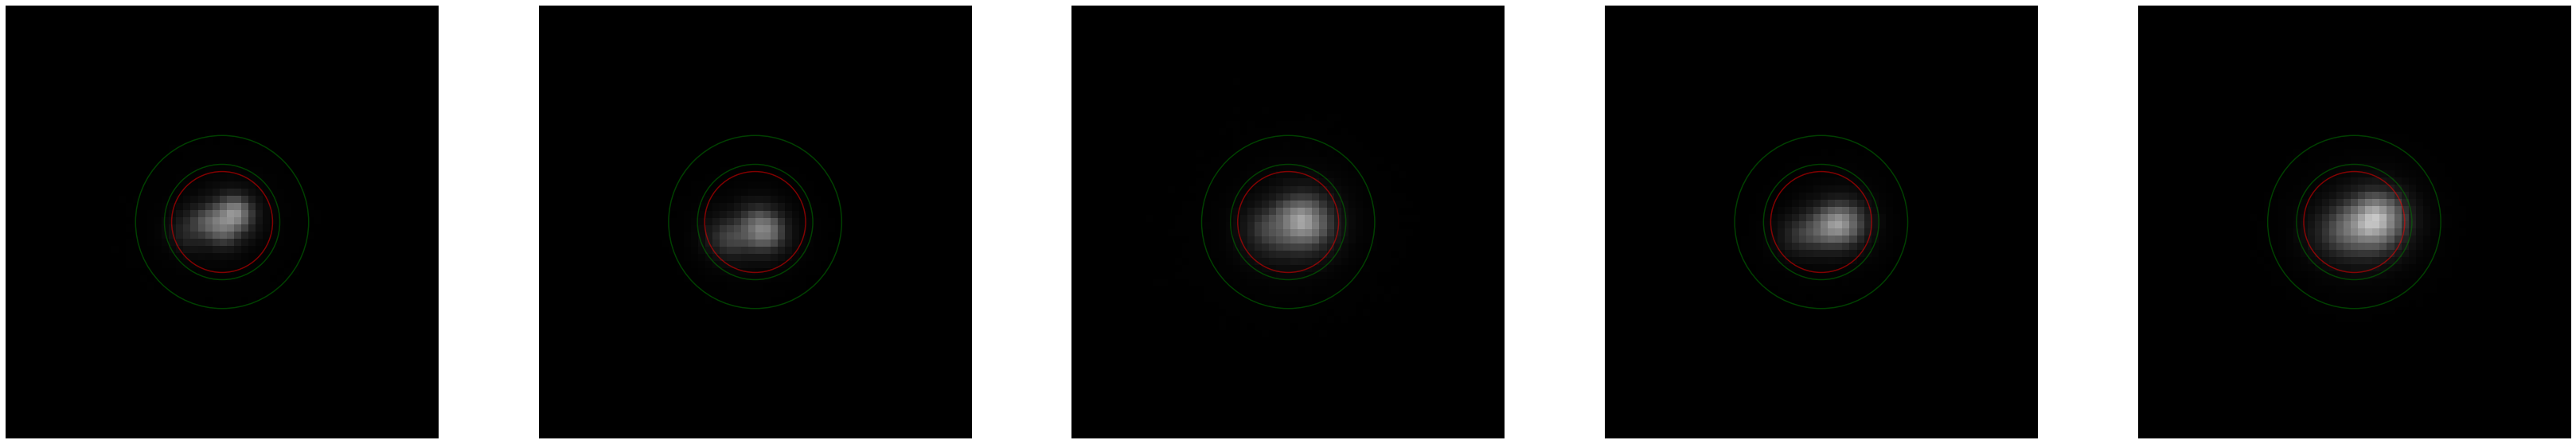

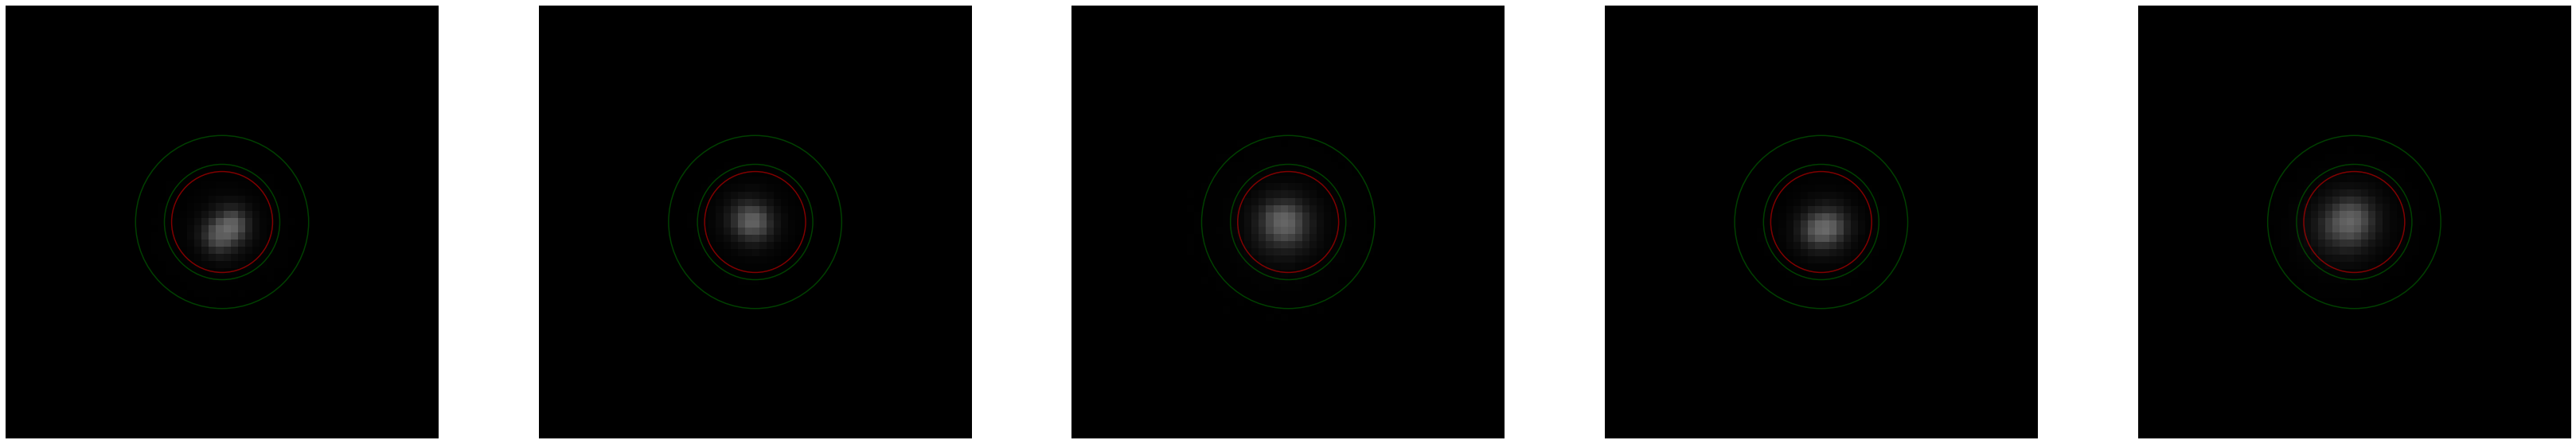

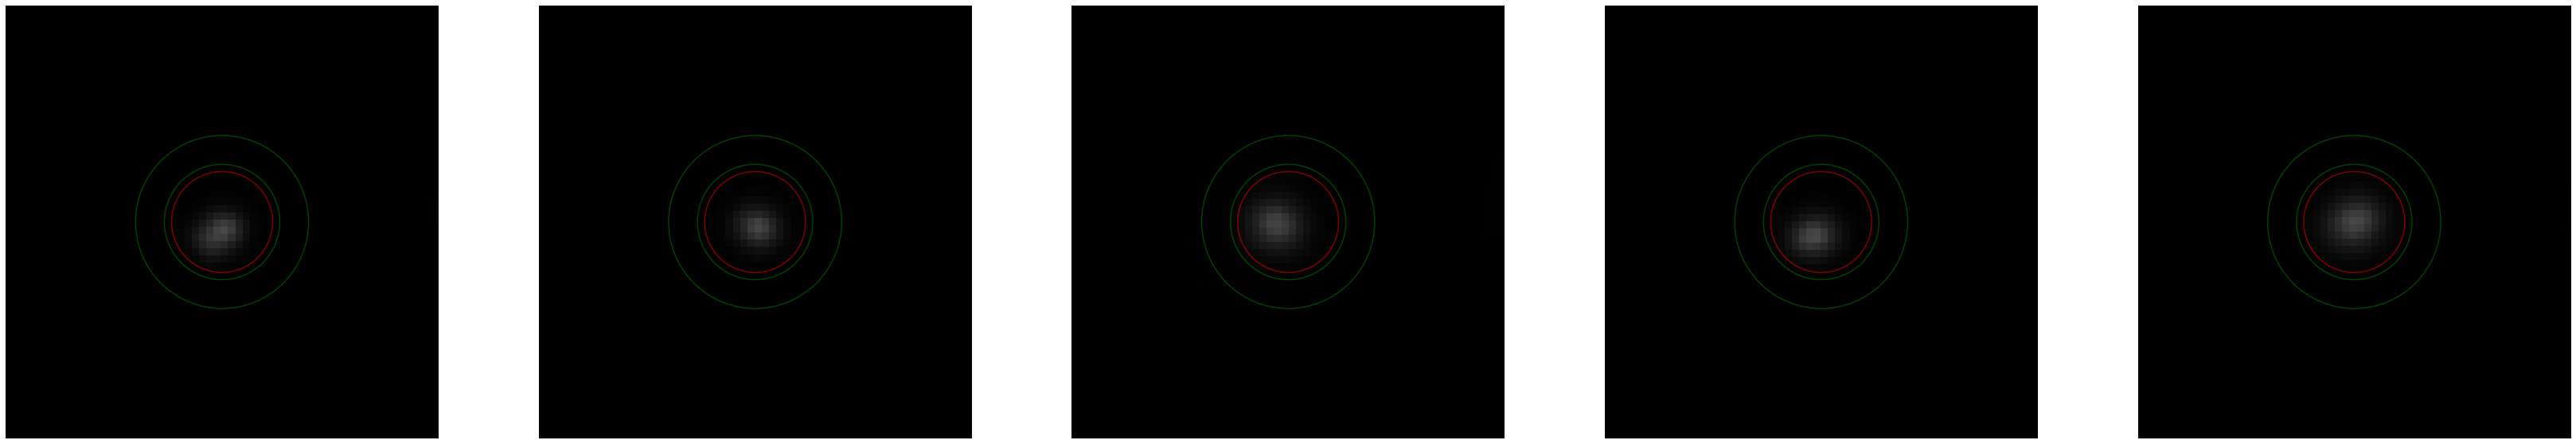

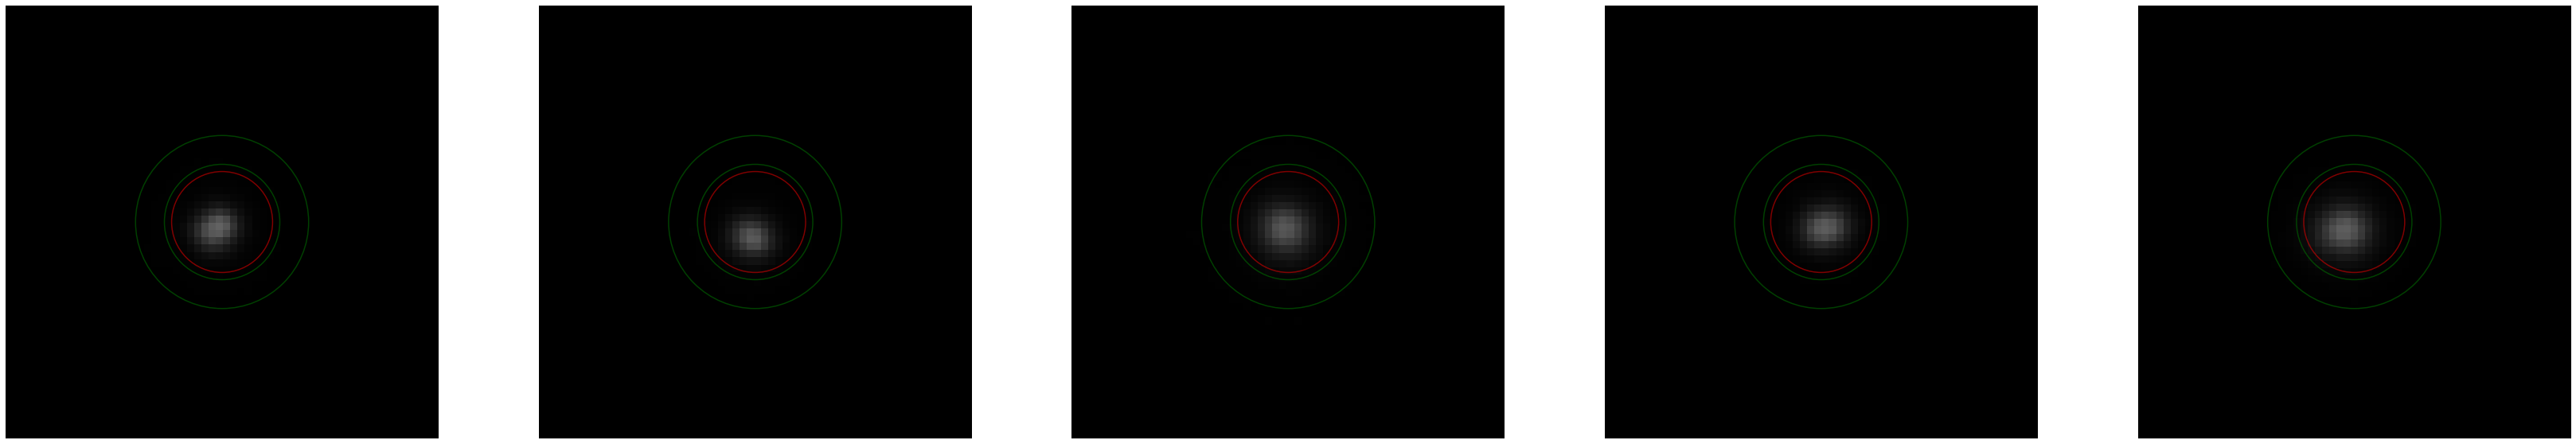

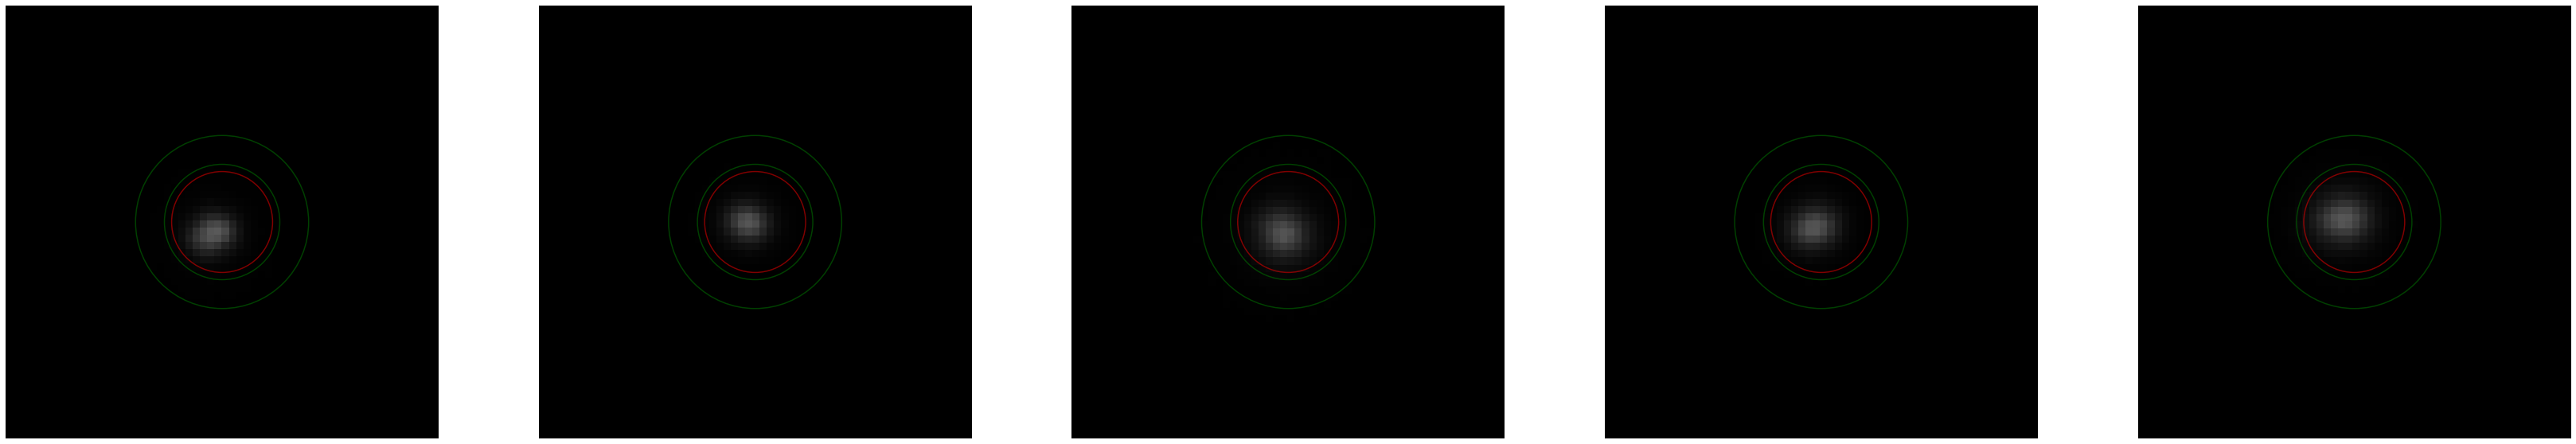

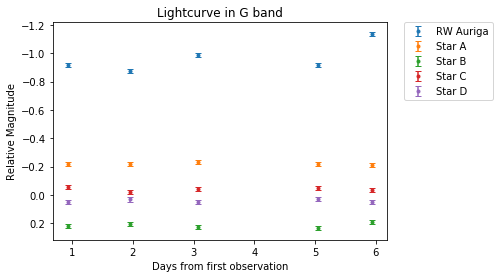

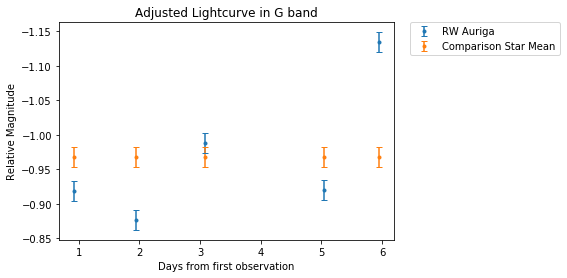

In [7]:
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")   

#One r band image from each observation day
gdata1 = getdata('redO170114_0142.new.fits')
gdata2 = getdata('redO170115_0096.new.fits')
gdata3 = getdata('redO170116_0446.new.fits')
gdata4 = getdata('redO170118_0105.new.fits')
gdata5 = getdata('redO170119_0108.new.fits')

#index of each image
g_idx1 = 45
g_idx2 = 53
g_idx3 = 107
g_idx4 = 124
g_idx5 = 166

shape=(5,1)
g_date = np.empty(shape)
g_date[0] = tscale[g_idx1]
g_date[1] = tscale[g_idx2]
g_date[2] = tscale[g_idx3]
g_date[3] = tscale[g_idx4]
g_date[4] = tscale[g_idx5]

#co-ordinate of RW Aur each day
g_c1 = [1025.86,968.84]
g_c2 = [1009.45,965.902]
g_c3 = [934.144,976.48]
g_c4 = [900.584,946.376]
g_c5 = [964.036,899.34]

#get magnitude of RW Aur vi}a aperture photometry
g_RWmag = ap_phot(g_c1,g_c2,g_c3,g_c4,g_c5,g_idx1,g_idx2,g_idx3,g_idx4,g_idx5)

##Do the same routine for background stars
#Star A
g_c_a1 = [1239.33,665.904]
g_c_a2 = [1223.96,660.258]
g_c_a3 = [1149.54,672.136]
g_c_a4 = [1115.4,642.28]
g_c_a5 = [1180.6,594.966]

g_mag_a = ap_phot(g_c_a1,g_c_a2,g_c_a3,g_c_a4,g_c_a5,g_idx1,g_idx2,g_idx3,g_idx4,g_idx5)

#Star B

g_c_b1 = [744.68,1068.16]
g_c_b2 = [727.64,1062.97]
g_c_b3 = [655.432,1074.28]
g_c_b4 = [621.576,1045.38]
g_c_b5 = [684.223,996.836]

g_mag_b = ap_phot(g_c_b1,g_c_b2,g_c_b3,g_c_b4,g_c_b5,g_idx1,g_idx2,g_idx3,g_idx4,g_idx5)

#Star C

g_c_c1 = [948.36,1540.64]
g_c_c2 = [931.72,1537.4]
g_c_c3 = [857.672,1547.75]
g_c_c4 = [823.456,1517.1]
g_c_c5 = [889.038,1470.92]

g_mag_c = ap_phot(g_c_c1,g_c_c2,g_c_c3,g_c_c4,g_c_c5,g_idx1,g_idx2,g_idx3,g_idx4,g_idx5)

#Star D 

g_c_d1 = [389.56,1705.24]
g_c_d2 = [372.92,1699.32]
g_c_d3 = [298.568,1712.4]
g_c_d4 = [265.678,1681.32]
g_c_d5 = [329.786,1633.36]

g_mag_d = ap_phot(g_c_d1,g_c_d2,g_c_d3,g_c_d4,g_c_d5,g_idx1,g_idx2,g_idx3,g_idx4,g_idx5)

#construct lightcurve
g_filt= 'G'
g_out = lightcurve(g_RWmag,g_mag_a,g_mag_b,g_mag_c,g_mag_d,g_idx1,g_idx2,g_idx3,g_idx4,g_idx5,g_filt)


[[-0.91895309]
 [-0.87694964]
 [-0.98835892]
 [-0.92030537]
 [-1.13421843]]
Variation in H Alpha = 0.1495173693281444
Variation in R = 0.21514060830491566
Variation in G = 0.25726879492169274


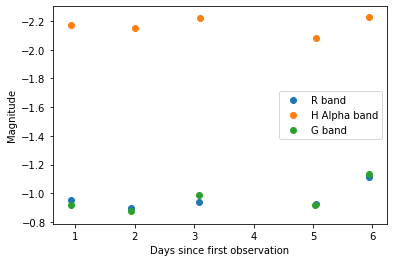

In [8]:
#Small section to compare magnitudes in different bands


corr_r_RWmag = r_out[1] #corrected magnitude of RW Aur in r band
corr_h_RWmag = h_out[1] #corrected magnitude of RW Aur in H-alpha band
corr_g_RWmag = g_out[1] #corrected magnitude of RW Aur in g band

#plot to compare the magnitude of RW Aur in different bands
plt.figure()
plt.scatter(r_date,corr_r_RWmag)
plt.scatter(h_date,corr_h_RWmag)
plt.scatter(g_date,corr_g_RWmag)
plt.legend(('R band', 'H Alpha band','G band'))
plt.xlabel('Days since first observation')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.savefig('rbandgbandhalpha.jpg', bbox_inches='tight')

#calculating variation in RW Aur magnitude in each band
h_var = np.amax(corr_h_RWmag) - np.amin(corr_h_RWmag)
r_var = np.amax(corr_r_RWmag) - np.amin(corr_r_RWmag)
g_var = np.amax(corr_g_RWmag) - np.amin(corr_g_RWmag)
print('Variation in H Alpha =', h_var)
print('Variation in R =', r_var)
print('Variation in G =', g_var)

Creatng color-magnitude diagrams

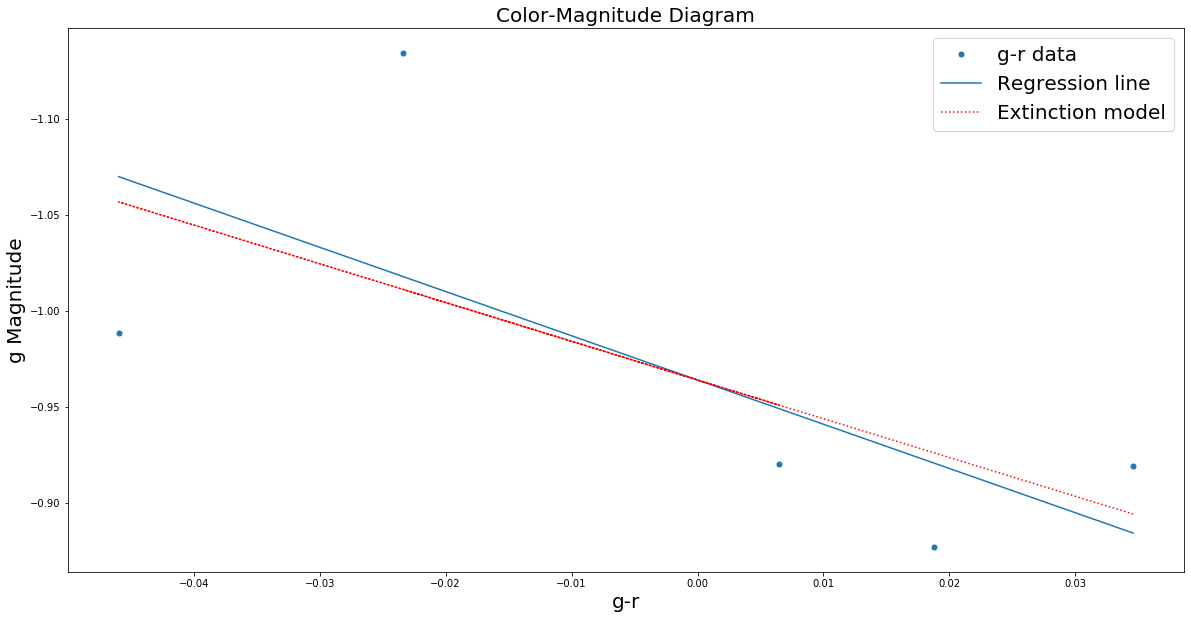

In [9]:
gr = corr_g_RWmag-corr_r_RWmag    #calculate g-r colour
grcol = gr[:,0]
gmag = corr_g_RWmag[:,0]
m, b = np.polyfit(grcol, gmag, 1) #create linear fit for g-r colour and g magnitude
y = m*gr+b

#modelling extinction due to dust
AgAj = 4.70      #define constants
ArAj = 2.66
Aj = 1
Ag = AgAj*Aj
Ar = ArAj*Aj
Agr = Ag-Ar
Agr = 2.04

maxi = np.where(corr_g_RWmag == np.min(corr_g_RWmag)) #calculate x limits for dust model
xstart = gr[maxi]
xend = gr[maxi]+Agr

ystart = corr_g_RWmag[maxi]   #calculate y limits for dust model
yend = corr_g_RWmag[maxi]+Ag

m1 = (yend-ystart)/(xend-xstart) #calculate gradient from x and y limits
x1 = np.linspace(np.min(gr),np.max(gr),num = 100)
y1 = m1*x1+b


#plot g-r data and extinction model
plt.figure(figsize=(20,10))
plt.plot(gr,corr_g_RWmag,'.',markersize=10)
plt.plot(x1,y1,'C0')
plt.plot(grcol,y,'r:')
plt.xlabel('g-r',fontsize=20)
plt.ylabel('g Magnitude',fontsize=20)
plt.gca().invert_yaxis()
plt.title('Color-Magnitude Diagram',fontsize=20)
plt.legend(('g-r data','Regression line','Extinction model'),fontsize=20)
plt.savefig('colormagwithline.jpg', bbox_inches='tight')